# Recomendación de películas

Vamos a ver los datos de TMDB que provee Kaggle para armar un modelo que prediga si una película nos va a gustar o no.
`tmdb_5000_movies.csv` y `tmdb_5000_credits.csv` vienen de Kaggle. `label.csv` lo completé subjetivamente con mi preferencia.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
full_df = pd.read_csv('data/tmdb_5000_movies.csv').set_index('id').join(
    pd.read_csv('data/tmdb_5000_credits.csv').set_index('movie_id').drop(columns=['title'])
).join(
    pd.read_csv('data/label.csv').set_index('id').drop(columns=['original_title'])
)
df = full_df[(full_df['label'] == 'g') | (full_df['label'] == 'b')]
df

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,label,Unnamed: 3
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",g,NaN
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",g,NaN
49026,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",b,NaN
559,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",b,NaN
38757,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...",g,NaN
99861,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",b,NaN
767,2500

Veamos cuántos datos de películas que me gustaron ("g") y que no me gustaron ("b") hay. Si está muy desbalanceado para alguno de los dos lados hay que conseguir más datos.

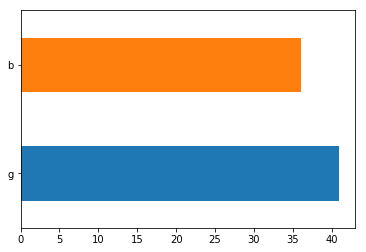

In [3]:
df['label'].value_counts().plot('barh');

Veamos ahora qué datos tenemos de cada una de las películas.

In [4]:
df.iloc[0]

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                        150.438
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                                                               162
spoken_languages        [{"iso_639_1":

Presupuesto, género, URL, palabras clave, lenguaje original, título original, resumen, popularidad en TMDB, empresas que produjeron la película, países donde se produjo, fecha de lanzamiento, ingresos, duración, lenguajes hablados, estado, _tagline_, título en inglés, voto promedio y cantidad de votos en TMDB, elenco, personal, y si me gustó o no.

Varios de estos datos son colecciones (géneros, palabras clave, etc) en formato JSON.

Abramos cada una de ellas en distintas columnas, y pasemos la fecha a un `datetime`. Para las columnas que tienen muchos valores distintos hagamos sólo los más populares que son los que pueden servir como features. Los que tienen pocas películas no sirven para el modelo porque no puede encontrar un patrón con pocos datos.

In [5]:
import json
all_genres_set = set()
def open_genres(s):
    genres = list(map(lambda x: 'is_{}'.format(x['name'].lower()), json.loads(s)))
    for g in genres:
        all_genres_set.add(g)
    return {g: 1 for g in genres}

genres = df['genres'].apply(open_genres)
all_genres = sorted(all_genres_set)
df[all_genres] = genres.apply(lambda x: pd.Series([x.get(g, 0) for g in all_genres]))
df

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,is_crime,is_drama,is_family,is_fantasy,is_horror,is_mystery,is_romance,is_science fiction,is_thriller,is_western
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,1,0,0,0,1,0,0
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,1,0,0,0,0,0,0
49026,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,1,0,0,0,0,0,0,1,0
559,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,1,0,0,0,0,0,0
38757,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,1,0,0,0,0,0,0,0
99861,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,1,0,0
767,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,0,0,1,1,0,0,0,0,0,0
209112,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.batmanvsupermandawnofjustice.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,1,0,0,0,0,0,0
1452,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,1,0,0,0,1,0,0


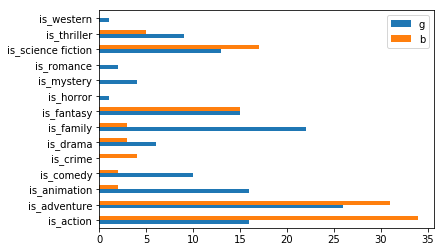

In [6]:
def plot_columns(columns):
    pd.DataFrame(
        [
            df[df['label'] == 'g'][columns].sum(),
            df[df['label'] == 'b'][columns].sum()
        ], index=['g', 'b']
    ).T.plot.barh();
plot_columns(all_genres)

In [7]:
all_keywords = {}
def open_keywords(s):
    keywords = list(map(lambda x: 'is_{}'.format(x['name'].lower()), json.loads(s)))
    for g in keywords:
        all_keywords[g] = all_keywords.get(g, 0) + 1
    return {g: 1 for g in keywords}

keywords = df['keywords'].apply(open_keywords)
all_keywords = sorted((x for x, y in all_keywords.items() if y > df.shape[0] * 0.1))
df[all_keywords] = keywords.apply(lambda x: pd.Series([x.get(g, 0) for g in all_keywords]))
df

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,is_western,is_3d,is_aftercreditsstinger,is_based on comic book,is_duringcreditsstinger,is_imax,is_marvel cinematic universe,is_marvel comic,is_sequel,is_superhero
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,1,0,0,0,0,0,0,0,0
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,1,0,0,0,0,0,0,0
49026,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,1,0,0,0,1
559,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,1,1,1
38757,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,1,0,0,0,0,0
99861,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,1,0,1,1,0,1,1,1,1
767,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,0,0,0,0,0,0,0,0,0,0
209112,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.batmanvsupermandawnofjustice.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,1,0,0,0,0,0,1
1452,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,1,0,0,0,0,1,1


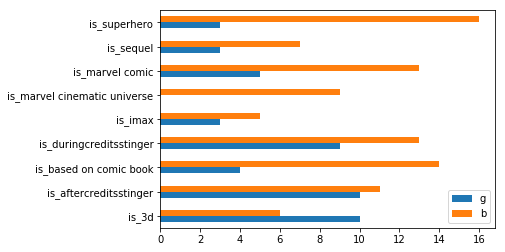

In [8]:
plot_columns(all_keywords)

In [9]:
popular_features = {}
def add_popular_features(field):
    allv = {}
    def openv(s):
        vs = list(map(lambda x: 'is_{}'.format(x['name'].lower()), json.loads(s)))
        for v in vs:
            allv[v] = allv.get(v, 0) + 1
        return {v: 1 for v in vs}

    vs = df[field].apply(openv)
    allv = sorted((x for x, y in allv.items() if y > df.shape[0] * 0.1))
    df[allv] = vs.apply(lambda x: pd.Series([x.get(g, 0) for g in allv]))
    popular_features[field] = allv
    return df
add_popular_features('production_companies')

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,is_imax,is_marvel cinematic universe,is_marvel comic,is_sequel,is_superhero,is_marvel studios,is_paramount pictures,is_twentieth century fox film corporation,is_walt disney pictures,is_warner bros.
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,1,0,0
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,1,0
49026,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,0,0,0,1,0,0,0,0,1
559,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,1,1,1,0,0,0,0,0
38757,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,1,0
99861,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,1,1,1,1,1,0,0,0,0
767,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,0,0,0,0,0,0,0,0,0,1
209112,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.batmanvsupermandawnofjustice.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,1,0,0,0,0,1
1452,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,

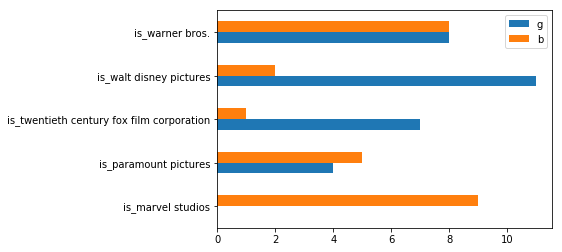

In [10]:
plot_columns(popular_features['production_companies'])

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])
df

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,is_imax,is_marvel cinematic universe,is_marvel comic,is_sequel,is_superhero,is_marvel studios,is_paramount pictures,is_twentieth century fox film corporation,is_walt disney pictures,is_warner bros.
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,1,0,0
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,1,0
49026,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,0,0,0,1,0,0,0,0,1
559,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,1,1,1,0,0,0,0,0
38757,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,1,0
99861,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,1,1,1,1,1,0,0,0,0
767,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,0,0,0,0,0,0,0,0,0,1
209112,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.batmanvsupermandawnofjustice.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,1,0,0,0,0,1
1452,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,

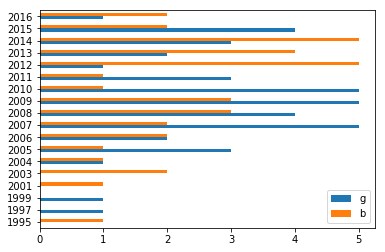

In [12]:
pd.DataFrame(
    [
        df[df['label'] == 'g']['release_date'].apply(lambda x: x.year).value_counts(),
        df[df['label'] == 'b']['release_date'].apply(lambda x: x.year).value_counts(),
    ], index=['g', 'b']
).T.fillna(0).plot.barh();

In [13]:
add_popular_features('spoken_languages')

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,is_sequel,is_superhero,is_marvel studios,is_paramount pictures,is_twentieth century fox film corporation,is_walt disney pictures,is_warner bros.,is_deutsch,is_english,is_français
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,1,0,0,0,1,0
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,1,0,0,1,0
49026,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,1,0,0,0,0,1,0,1,0
559,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,1,0,0,0,0,0,0,1,1
38757,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,1,0,0,1,0
99861,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,1,1,0,0,0,0,0,1,0
767,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,0,0,0,0,0,0,1,0,1,0
209112,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.batmanvsupermandawnofjustice.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,1,0,0,0,0,1,0,1,0
1452,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,1,0,0,0,0,1,1,1,1

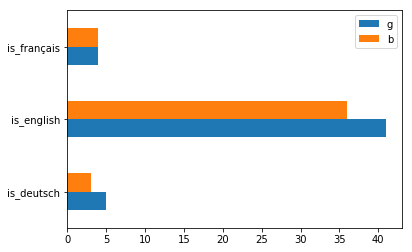

In [14]:
plot_columns(popular_features['spoken_languages'])

In [15]:
json.loads(df['crew'].iloc[0])

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [16]:
add_popular_features('crew')

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,is_kevin kaska,is_louis d'esposito,is_luca marco paracels,is_michael bay,is_pete docter,is_peter jackson,is_sarah finn,is_stan lee,is_ve neill,is_victoria alonso
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,0,0
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,1,0
49026,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,0,0,0,0,0,0,0,0,0
559,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,1,0,0
38757,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,0,0
99861,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,1,1,0,0,0,1,1,0,1
767,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,0,0,0,0,0,0,0,0,0,0
209112,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.batmanvsupermandawnofjustice.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,0,0,0,0,0,0,0,0,0
1452,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,0,0


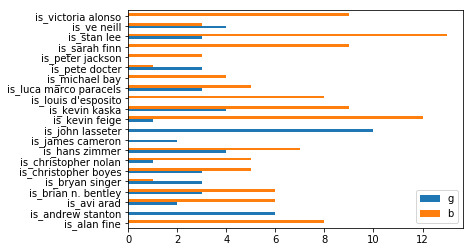

In [17]:
plot_columns(popular_features['crew'])

In [18]:
json.loads(df['cast'].iloc[0])

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [19]:
add_popular_features('cast')

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,is_luca marco paracels,is_michael bay,is_pete docter,is_peter jackson,is_sarah finn,is_stan lee,is_ve neill,is_victoria alonso,is_gary oldman,is_jess harnell
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,0,0
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,1,0,0,0
49026,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,1,0
559,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,1,0,0,0,0
38757,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,0,0
99861,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,0,0,0,1,1,0,1,0,0
767,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,0,0,0,0,0,0,0,0,0,0
209112,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.batmanvsupermandawnofjustice.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,0,0
1452,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,0,0


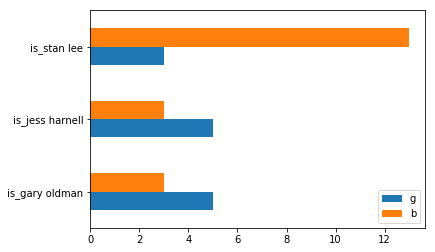

In [20]:
plot_columns(popular_features['cast'])

Podemos investigar la distribución de género reportada en el elenco de cada película. Quizás películas con más hombres, más mujeres o una distribución pareja sean mejor que las alternativas.

In [21]:
from statistics import mean 

df['avg_cast_gender'] = df['cast'].apply(lambda cast: mean([x['gender'] for x in json.loads(cast)]))
df['num_cast'] = df['cast'].apply(lambda cast: len(json.loads(cast)))
df

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,is_pete docter,is_peter jackson,is_sarah finn,is_stan lee,is_ve neill,is_victoria alonso,is_gary oldman,is_jess harnell,avg_cast_gender,num_cast
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,0.626506,83
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,1,0,0,0,1.617647,34
49026,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,1,0,0.993671,158
559,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,1,0,0,0,0,0.853147,143
38757,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,1.384615,13
99861,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,1,1,0,1,0,0,0.763889,72
767,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,0,0,0,0,0,0,0,0,1.326531,49
209112,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.batmanvsupermandawnofjustice.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,0,0,0,0,0,0,0,1.368421,152
1452,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United Sta

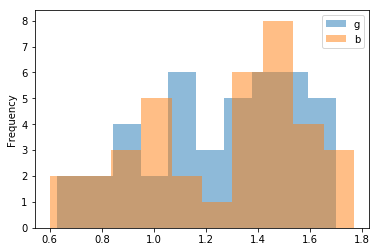

In [22]:
df[df['label'] == 'g']['avg_cast_gender'].plot.hist(alpha=0.5)
df[df['label'] == 'b']['avg_cast_gender'].plot.hist(alpha=0.5)
plt.legend('gb');

Hasta acá es toda la información que vamos a usar. Creemos un modelo con todas las columnas y veamos su puntaje. También hagamos uno sólo con los distintos géneros.

In [23]:
df.columns.tolist()

['budget',
 'genres',
 'homepage',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'cast',
 'crew',
 'label',
 'Unnamed: 3',
 'is_action',
 'is_adventure',
 'is_animation',
 'is_comedy',
 'is_crime',
 'is_drama',
 'is_family',
 'is_fantasy',
 'is_horror',
 'is_mystery',
 'is_romance',
 'is_science fiction',
 'is_thriller',
 'is_western',
 'is_3d',
 'is_aftercreditsstinger',
 'is_based on comic book',
 'is_duringcreditsstinger',
 'is_imax',
 'is_marvel cinematic universe',
 'is_marvel comic',
 'is_sequel',
 'is_superhero',
 'is_marvel studios',
 'is_paramount pictures',
 'is_twentieth century fox film corporation',
 'is_walt disney pictures',
 'is_warner bros.',
 'is_deutsch',
 'is_english',
 'is_français',
 'is_alan fine',
 'is_andrew stanton',
 'is_avi arad',
 'is_brian n. ben

In [24]:
df['label'] = df['label'].apply(lambda x: int(x == 'g'))

In [25]:
train = df[['budget', 'popularity', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'label', 'is_action',
       'is_adventure', 'is_animation', 'is_comedy', 'is_crime', 'is_drama',
       'is_family', 'is_fantasy', 'is_horror', 'is_mystery', 'is_romance',
       'is_science fiction', 'is_thriller', 'is_western', 'is_3d',
       'is_aftercreditsstinger', 'is_based on comic book',
       'is_duringcreditsstinger', 'is_imax', 'is_marvel cinematic universe',
       'is_marvel comic', 'is_sequel', 'is_superhero', 'is_marvel studios',
       'is_paramount pictures', 'is_twentieth century fox film corporation',
       'is_walt disney pictures', 'is_warner bros.', 'is_deutsch',
       'is_english', 'is_français', 'is_alan fine', 'is_andrew stanton',
       'is_avi arad', 'is_brian n. bentley', 'is_bryan singer',
       'is_christopher boyes', 'is_christopher nolan', 'is_hans zimmer',
       'is_james cameron', 'is_john lasseter', 'is_kevin feige',
       'is_kevin kaska', 'is_louis d\'esposito', 'is_luca marco paracels',
       'is_michael bay', 'is_pete docter', 'is_peter jackson', 'is_sarah finn',
       'is_stan lee', 'is_ve neill', 'is_victoria alonso', 'is_gary oldman',
       'is_jess harnell', 'avg_cast_gender', 'num_cast']]

In [26]:
random_state = 12345

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
X, y = train.drop(columns=['label']), train['label']
clf = RandomForestClassifier(n_estimators=10, random_state=random_state)
cross_validate(clf, X, y, scoring=['accuracy'], return_train_score=False, cv=3)

{'fit_time': array([0.01182055, 0.01020455, 0.00786781]),
 'score_time': array([0.00130868, 0.00185061, 0.00134301]),
 'test_accuracy': array([0.61538462, 0.76923077, 0.72      ])}

In [28]:
X = df[all_genres]
y = df['label']
clf = RandomForestClassifier(n_estimators=10, random_state=random_state)
cross_validate(clf, X, y, scoring=['accuracy'], return_train_score=False, cv=3)

{'fit_time': array([0.01232505, 0.00924039, 0.00804996]),
 'score_time': array([0.00141072, 0.00174952, 0.00120997]),
 'test_accuracy': array([0.69230769, 0.84615385, 0.76      ])}

In [29]:
clf.fit(X, y);

In [30]:
movies = full_df[(full_df['original_title'] == 'Inside Out') | (full_df['original_title'] == 'Iron Man')]
movies

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,label,Unnamed: 3
id,,,,,,,,,,,,,,,,,,,,,
1726,140000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://www.ironmanmovie.com/,"[{""id"": 539, ""name"": ""middle east""}, {""id"": 61...",en,Iron Man,"After being held captive in an Afghan cave, bi...",120.725053,"[{""name"": ""Marvel Studios"", ""id"": 420}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Heroes aren't born. They're built.,Iron Man,7.4,8776,"[{""cast_id"": 19, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""52fe4311c3a36847f8037f21"", ""de...",b,NaN
150540,175000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",http://movies.disney.com/inside-out,"[{""id"": 1566, ""name"": ""dream""}, {""id"": 6513, ""...",en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",128.655964,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Meet the little voices inside your head.,Inside Out,8.0,6560,"[{""cast_id"": 4, ""character"": ""Joy (voice)"", ""c...","[{""credit_id"": ""56098866c3a368681000003a"", ""de...",g,NaN


In [31]:
clf.predict_proba(movies.apply(lambda m: pd.Series([int(g in open_genres(m['genres'])) for g in all_genres]), axis=1))

array([[0.91642974, 0.08357026],
       [0.        , 1.        ]])

In [32]:
from sklearn.metrics import accuracy_score
predict = clf.predict(X)
accuracy_score(predict, y), (predict != y).sum()

(0.8701298701298701, 10)

Probemos agregar al modelo de géneros el promedio de voto y presupuesto y veamos cuánto mejora.

In [33]:
new_features2 = ['vote_average', 'budget', ]
features2 = all_genres + new_features2

In [34]:
X = df[all_genres + new_features2]
y = df['label']
clf = RandomForestClassifier(random_state=random_state, n_estimators=10)
cross_validate(clf, X, y, scoring=['accuracy'], return_train_score=False, cv=3)

{'fit_time': array([0.01855135, 0.01036787, 0.01418471]),
 'score_time': array([0.00280809, 0.00157499, 0.00153089]),
 'test_accuracy': array([0.69230769, 0.84615385, 0.76      ])}

In [35]:
clf.fit(X, y)
clf.predict_proba(movies.apply(lambda m: pd.Series([int(g in open_genres(m['genres'])) for g in all_genres] + m[new_features2].tolist()), axis=1))

array([[1., 0.],
       [0., 1.]])

In [36]:
predict = clf.predict(X)
accuracy_score(predict, y), (predict != y).sum()

(0.948051948051948, 4)

Veamos qué películas falló en predecir.

In [37]:
df[predict != y]['title']

id
135397              Jurassic World
8487                Wild Wild West
49538           X-Men: First Class
2080      X-Men Origins: Wolverine
Name: title, dtype: object